In [100]:
from PolynomialRegressionModel import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from NN import NeuralNetModel
import json

In [103]:
with open("config.json", "r") as f:
    config = json.load(f)

In [104]:
model_config = config["models"]
model_config

{'enabled': True,
 'model_name': 'Cases',
 'model': {'type': 'neural_net',
  'alpha': 1e-06,
  'hidden_layer_sizes': 'auto',
  'learning_rate_init': 0.1,
  'max_iter': 50000,
  'batch_size': 32,
  'tol': 1e-06,
  'n_iter_no_change': 250,
  'verbose': False},
 'datagrabber_class': 'CasesDataGrabber',
 'grab_data_from_server': True,
 'offline_dataset_date': '2020-09-26',
 'days_to_predict': 10}

In [105]:
df_vac = pd.read_csv('Confirmed_VS_Vaccinated_US.csv').drop(columns=['Unnamed: 0'])
df_vac

,ObservationDate,Confirmed,People_Fully_Vaccinated
0,2020-12-20,76818746.0,0.0
1,2020-12-21,77367360.0,0.0
2,2020-12-22,78016498.0,0.0
3,2020-12-23,78710560.0,0.0
4,2020-12-24,79377452.0,0.0
...,...,...,...
65,2021-02-23,112019890.0,41842414.0
66,2021-02-24,112464430.0,42359354.0
67,2021-02-25,112911535.0,43514673.0
68,2021-02-26,113325717.0,45521878.0


In [106]:
x = np.array(df_vac.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,22):
    list.append(69 +i)
x_pred = np.array(list).reshape(-1, 1)
x_pred

array([[70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80],
       [81],
       [82],
       [83],
       [84],
       [85],
       [86],
       [87],
       [88],
       [89],
       [90]])

In [107]:
y_c_train = df_vac.iloc[:,1]
y_v_train = df_vac.iloc[:,-1]
y_v_train

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [109]:
neural_net_model = NeuralNetModel(model_config["model_name"])
neural_net_model.train(x, y_v_train, model_config["model"])

In [110]:
beginning_day=len(x)
limit=10
next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
y_v_pred = neural_net_model.get_predictions(x_pred)

In [111]:
y_v_pred

array([50344412, 52143297, 53942183, 55741069, 57539955, 59338841,
       61137727, 62936613, 64735499, 66534384, 68333270, 70132156,
       71931042, 73729928, 75528814, 77327700, 79126586, 80925471,
       82724357, 84523243, 86322129])

In [112]:
df_y = pd.read_csv('02_28_to_03_20_vaccination.csv')
y_v_test = df_y.iloc[:,-1]
y_v_test

0     50217092.0
1     52969506.0
2     52933742.0
3     56283119.0
4     57540294.0
5     58534730.0
6     58056286.0
7     60088698.0
8     63270356.0
9     64762432.0
10    69592914.0
11    73010600.0
12    75600854.0
13    78513026.0
14    77982576.0
15    82336622.0
16    79035899.0
17    90713305.0
18    88548724.0
19    90448901.0
20    81404397.0
Name: People_Fully_Vaccinated, dtype: float64

In [113]:
import matplotlib.pyplot as plt

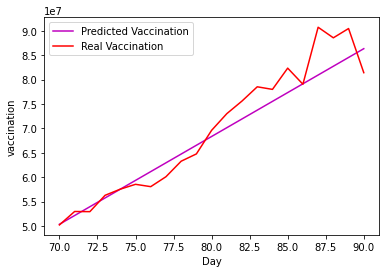

In [114]:
plt.plot(x_pred, y_v_pred, color='m', label="Predicted Vaccination")
plt.plot(x_pred,y_v_test,color='r', label="Real Vaccination")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("vaccination")
plt.show()

In [117]:
x_100 = np.array(df_vac.index.values.tolist()).reshape(-1, 1)
list = []
for i in range(1,200):
    list.append(69 +i)
x_pred_100 = np.array(list).reshape(-1, 1)

In [118]:
neural_net_model_100 = NeuralNetModel(model_config["model_name"])
neural_net_model_100.train(x, y_v_train, model_config["model"])

In [121]:
y_v_pred_vac_100 = neural_net_model_100.get_predictions(x_pred_100)
y_v_pred_vac_100

array([ 49062123,  50802451,  52542780,  54283109,  56023437,  57763766,
        59504094,  61244423,  62984751,  64725080,  66465408,  68205737,
        69946065,  71686394,  73426722,  75167051,  76907380,  78647708,
        80388037,  82128365,  83868694,  85609022,  87349351,  89089679,
        90830008,  92570336,  94310665,  96050994,  97791322,  99531651,
       101271979, 103012308, 104752636, 106492965, 108233293, 109973622,
       111713950, 113454279, 115194608, 116934936, 118675265, 120415593,
       122155922, 123896250, 125636579, 127376907, 129117236, 130857564,
       132597893, 134338222, 136078550, 137818879, 139559207, 141299536,
       143039864, 144780193, 146520521, 148260850, 150001178, 151741507,
       153481836, 155222164, 156962493, 158702821, 160443150, 162183478,
       163923807, 165664135, 167404464, 169144792, 170885121, 172625450,
       174365778, 176106107, 177846435, 179586764, 181327092, 183067421,
       184807749, 186548078, 188288406, 190028735, 

In [123]:
y_c_train_100 = df_vac.iloc[:,1]
vaccination = df_vac.iloc[:,-1]
vaccination

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
         ...    
65    41842414.0
66    42359354.0
67    43514673.0
68    45521878.0
69    46345540.0
Name: People_Fully_Vaccinated, Length: 70, dtype: float64

In [124]:
x_c_train_100 = np.vstack((np.array(df_vac.index.values.tolist()), vaccination)).T
x_c_train_100

array([[0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 0.0000000e+00],
       [3.0000000e+00, 0.0000000e+00],
       [4.0000000e+00, 0.0000000e+00],
       [5.0000000e+00, 0.0000000e+00],
       [6.0000000e+00, 0.0000000e+00],
       [7.0000000e+00, 0.0000000e+00],
       [8.0000000e+00, 0.0000000e+00],
       [9.0000000e+00, 0.0000000e+00],
       [1.0000000e+01, 0.0000000e+00],
       [1.1000000e+01, 0.0000000e+00],
       [1.2000000e+01, 0.0000000e+00],
       [1.3000000e+01, 0.0000000e+00],
       [1.4000000e+01, 4.4004000e+04],
       [1.5000000e+01, 2.0000000e+00],
       [1.6000000e+01, 2.0000000e+00],
       [1.7000000e+01, 2.0000000e+00],
       [1.8000000e+01, 2.1780000e+03],
       [1.9000000e+01, 4.0610000e+03],
       [2.0000000e+01, 5.9100000e+03],
       [2.1000000e+01, 1.0446960e+06],
       [2.2000000e+01, 8.5545100e+05],
       [2.3000000e+01, 9.2336300e+05],
       [2.4000000e+01, 1.0109450e+06],
       [2.5000000e+01, 2.

In [125]:
neural_net_model_100_cases = NeuralNetModel(model_config["model_name"])
neural_net_model_100_cases.train(x_c_train_100, y_c_train_100, model_config["model"])

In [127]:
x_c_test_100 = np.vstack((np.array(list), y_v_pred_vac_100)).T
x_c_test_100

array([[       70,  49062123],
       [       71,  50802451],
       [       72,  52542780],
       [       73,  54283109],
       [       74,  56023437],
       [       75,  57763766],
       [       76,  59504094],
       [       77,  61244423],
       [       78,  62984751],
       [       79,  64725080],
       [       80,  66465408],
       [       81,  68205737],
       [       82,  69946065],
       [       83,  71686394],
       [       84,  73426722],
       [       85,  75167051],
       [       86,  76907380],
       [       87,  78647708],
       [       88,  80388037],
       [       89,  82128365],
       [       90,  83868694],
       [       91,  85609022],
       [       92,  87349351],
       [       93,  89089679],
       [       94,  90830008],
       [       95,  92570336],
       [       96,  94310665],
       [       97,  96050994],
       [       98,  97791322],
       [       99,  99531651],
       [      100, 101271979],
       [      101, 103012308],
       [

In [128]:
y_c_pred_100 = neural_net_model_100_cases.get_predictions(x_c_test_100)
y_c_pred_100

array([ 188473093,  195158031,  201842972,  208527913,  215212850,
        221897791,  228582728,  235267669,  241952607,  248637548,
        255322485,  262007426,  268692363,  275377304,  282062241,
        288747182,  295432124,  302117061,  308802002,  315486939,
        322171880,  328856817,  335541758,  342226696,  348911637,
        355596574,  362281515,  368966456,  375651393,  382336334,
        389021272,  395706213,  402391150,  409076091,  415761028,
        422445969,  429130906,  435815847,  442500788,  449185726,
        455870667,  462555604,  469240545,  475925482,  482610423,
        489295361,  495980302,  502665239,  509350180,  516035121,
        522720058,  529404999,  536089936,  542774878,  549459815,
        556144756,  562829693,  569514634,  576199571,  582884512,
        589569453,  596254391,  602939332,  609624269,  616309210,
        622994147,  629679088,  636364026,  643048967,  649733904,
        656418845,  663103786,  669788723,  676473664,  683158

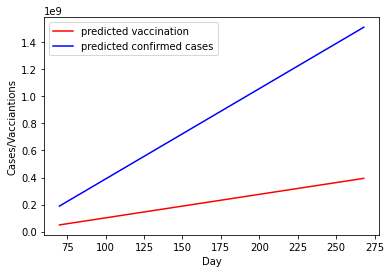

In [130]:
plt.plot(x_pred_100, y_v_pred_vac_100, color='r', label="predicted vaccination")
plt.plot(x_pred_100,y_c_pred_100,color='b', label="predicted confirmed cases")
#plt.title("Amount of " + model_name + " in each day")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Cases/Vacciantions")
plt.show()